In [23]:
import pandas as pd

df = pd.read_csv('/content/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
for i in df:
  print('{}:{}'.format(i,df[i].values))

YearsExperience:[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
Salary:[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


<Axes: >

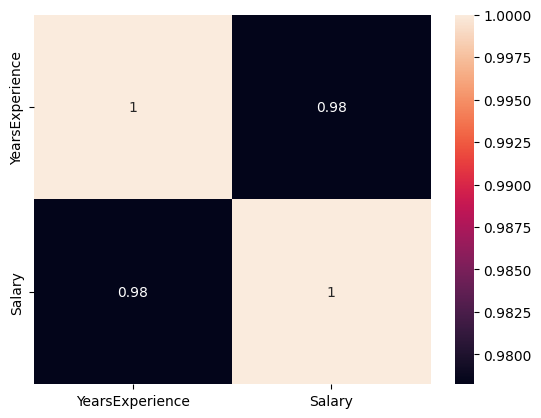

In [ ]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr(),annot=True)

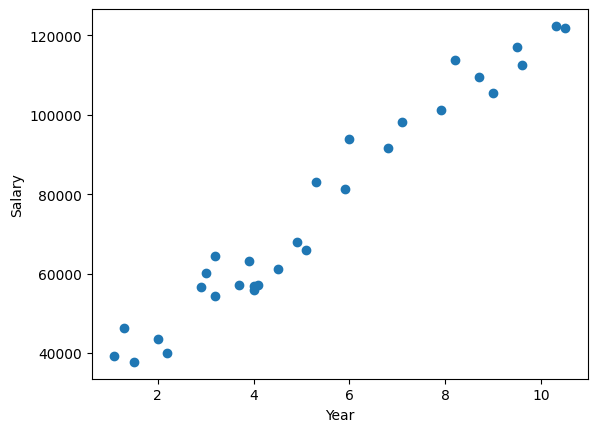

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.YearsExperience,df.Salary)
plt.xlabel("Year")
plt.ylabel("Salary")
plt.show()

### Part 3: Train linear regression models

Using scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = LinearRegression()
x = df.YearsExperience
x = np.array(x)
x = x.reshape(-1, 1)
y = df.Salary

In [ ]:
model = model.fit(x,y)

In [ ]:
x_5 = [[5]]
y_5 = model.predict(x_5)
print("x = {0} , y = {1}".format(x_5, y_5))

x = [[5]] , y = [73042.01180594]


y = 25792.20 + 9449.96 x


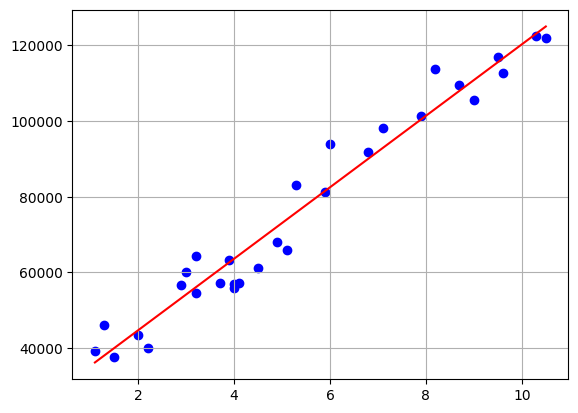

In [ ]:
intercept = model.intercept_
coefficient = model.coef_
print("y = {0:.2f} + {1:.2f} x".format(intercept, coefficient[0]))

y_plot = model.predict(x)
plt.scatter(x,y,color ="b")
plt.plot(x,y_plot,color="r")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(x)
y_error = y - y_pred
r2_score(y, y_pred)

0.9569566641435086

# การพิสูจน์ว่าโมเดลเป็น Linear จริงๆ

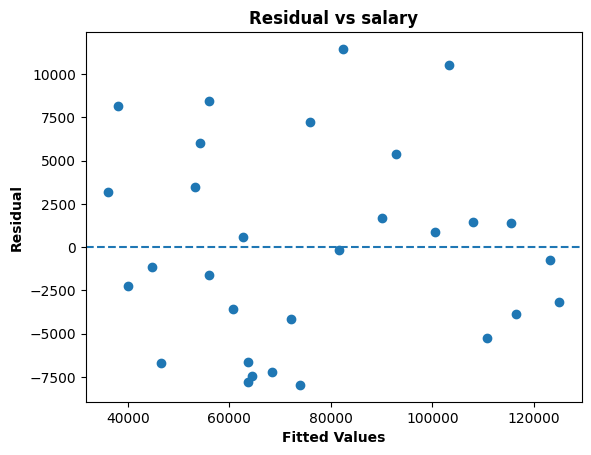

In [ ]:
#L & E
plt.scatter(y_pred, y_error) #สร้างกราฟแบบจุด
plt.title("Residual vs salary", fontsize=12, fontweight='bold')
plt.axhline(y=0, linestyle='--')
plt.xlabel("Fitted Values", fontweight='bold')
plt.ylabel("Residual", fontweight='bold')
plt.show() #แสดงกราฟ

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Example data
# Independent variable (X) and dependent variable (Y)

# Add a constant to the independent variable for the intercept
X_with_constant = sm.add_constant(x)

# Fit the OLS regression model
model = sm.OLS(y, X_with_constant).fit()

# Get the residuals from the model
residuals = model.resid

# Perform the Durbin-Watson test
dw_statistic = durbin_watson(residuals)

# Output the result
print(f"Durbin-Watson statistic: {dw_statistic}")

# Interpretation guide:
# - DW ≈ 2: No autocorrelation
# - DW < 2: Positive autocorrelation
# - DW > 2: Negative autocorrelation


Durbin-Watson statistic: 1.6479910076183397


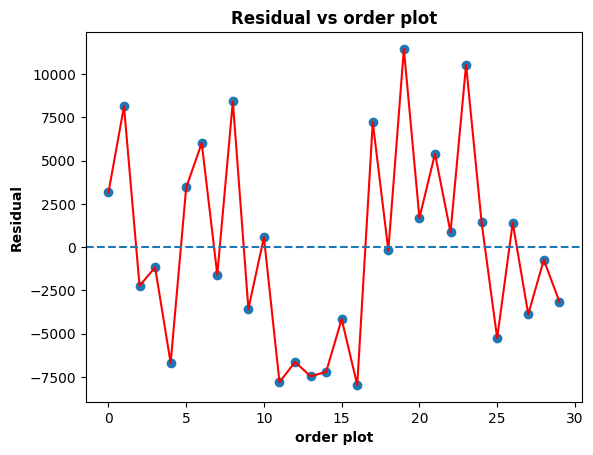

In [ ]:
#I
plt.scatter(range(len(y_error)), y_error) #สร้างกราฟแบบจุด
plt.plot(range(len(y_error)), y_error, color='r') #สร้างกราฟแบบเส้น
plt.title("Residual vs order plot", fontsize=12, fontweight='bold')
plt.axhline(y=0, linestyle='--')
plt.xlabel("order plot", fontweight='bold')
plt.ylabel("Residual", fontweight='bold')
plt.show() #แสดงกราฟ

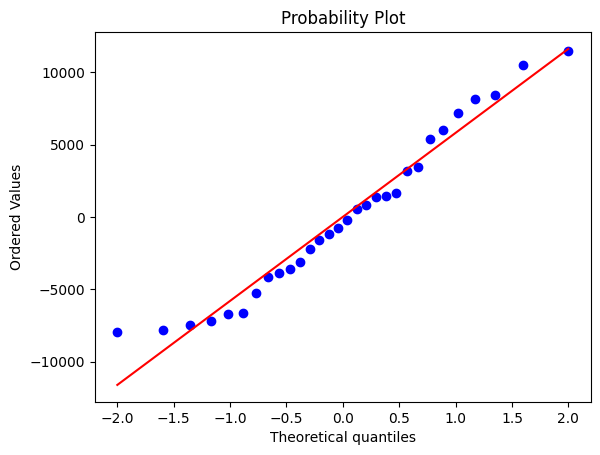

In [25]:
#N
import scipy.stats as scipystats #นำเข้า library scipystats
import pylab #นำเข้า library pylab

# Add a constant to X before prediction
X_with_constant = sm.add_constant(x)

elem1res = pd.concat([df, pd.Series(y_error, name = 'resid'), pd.Series(model.predict(X_with_constant), name = "predict")], axis = 1) #นำเอาค่า y_error และ y_pred มารวมกัน
scipystats.probplot(elem1res.resid, dist="norm", plot=pylab) #สร้างกราฟแบบจุด
pylab.show() #แสดงกราฟ

In [26]:
elem1res

,YearsExperience,Salary,resid,predict
0,1.1,39343,3155.841248,36187.158752
1,1.3,46205,8127.848783,38077.151217
2,1.5,37731,-2236.143681,39967.143681
3,2.0,43525,-1167.124842,44692.124842
4,2.2,39891,-6691.117306,46582.117306
5,2.9,56642,3444.909069,53197.090931
6,3.0,60150,6007.912837,54142.087163
7,3.2,54445,-1587.079627,56032.079627
8,3.2,64445,8412.920373,56032.079627
9,3.7,57189,-3568.060788,60757.060788


In [28]:
model.summary()
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.14e-20
Time:                        15:31:08   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""